In [1]:
#Task 1: Data Retrieving and Preparation

#First need to sanity check and check for errors or typos
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#read the csv
df = pd.read_csv("AdultData.csv",sep = None, engine = 'python',header = None, decimal = '.', names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income' ]  )
#read the columns 
df.dtypes
#checking the count of the columns
df.count()
#copy the data
df_1 = df
#checking age range first
dfAge = df['age']
dfAgeRangeCheck = dfAge.between(16,100)
dfAgeRangeCheck[dfAgeRangeCheck[:] == False]
#no value that is outside of range 16 and 100
#Next to check the workclass
df['workclass'].value_counts()
#number of missing values
mv=1836
#remove whitespace
df['workclass']=df['workclass'].str.strip()
#total counts of dataset
df.count()
#calculate the percentage of missing values
p = (1836.0/32561)
#p=0.056 which means only 5.6% values have missed. It is very insignificant, so we will drop them

# we can see that there are a few missing values
#Next is fnlwgt
dfFinalWeight = df['fnlwgt']
df[df['fnlwgt'].isnull()]
#continuous variable with no nulls
#Next is education
dfEducation = df['education']
df['education']=df['education'].str.strip()
dfEducation.value_counts()
#check No nulls
df[dfEducation.isnull()]
#no nulls next is education-num
dfEducationNum = df['education-num']
dfEducationNum.value_counts()
#no null variables
#Next is marital-status
dfMaritalStatus = df['marital-status']
dfMaritalStatus.value_counts()
#no missing variables. Onto occupation
df['occupation'].value_counts()
#total number of missing values
mv=mv+7
#remove whitespace
df['occupation']=df['occupation'].str.strip()
#total counts of dataset
df.count()
#calculate the percentage of missing values
p = (7.0/30725)
#p=0.00022 which means only 5.6% values have missed. It is very insignificant, so we will drop them

#next is relationship
dfRelationship = df['relationship']
dfRelationship.value_counts()
#no missing values,
#next we move onto race
dfRace = df['race']
dfRace.value_counts()
#no missing values, so onto the next variable 
dfSex = df['sex']
dfSex.value_counts()
#no missing variables, so onto the next of capital-gain 0 or above
dfCapitalGain = df['capital-gain']
dfCapitalGainCheck = dfCapitalGain.between(0,999999)
dfCapitalGainCheck[dfCapitalGainCheck[:] == False]
#capital-loss check 0 or above
dfCapitalLoss = df['capital-loss']
dfCapitalLossCheck = dfCapitalLoss.between(0,999999)
dfCapitalLossCheck[dfCapitalLossCheck[:] == False]
#checking if hours per week is at least 0 and above
dfHoursPerWeek = df['hours-per-week']
dfHoursPerWeekCheck = dfHoursPerWeek.between(0,9999999)
dfHoursPerWeekCheck[dfHoursPerWeekCheck[:] == False]
#checking native countries, 556 records of '?' values
df['native-country'].value_counts()
#total number of missing values
mv=mv+556
#remove whitespace
df['native-country']=df['native-country'].str.strip()
#total counts of dataset, total records is 30178
df.count()
#calculate the percentage of missing values
p = (556.0/30178)
#p=0.0184 which means only 5.6% values have missed. It is very insignificant, so we will drop them

#Plot to show how many records have been deleted vs. current number of records
plt.pie([mv, df.shape[0]],autopct='%1.1f%%', shadow=False)
plt.legend(['Number of Dropped Records', 'Number of Current Records'])
plt.axis('equal')
plt.title("Figure 1 Percentage of dropped values")
plt.show()
#after drop missing values, data are still big enough to further investigate.

<Figure size 640x480 with 1 Axes>

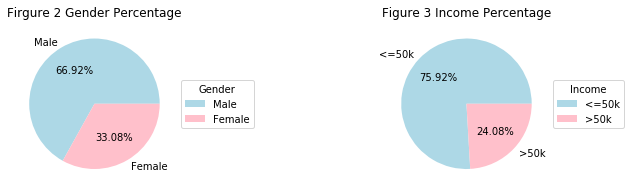

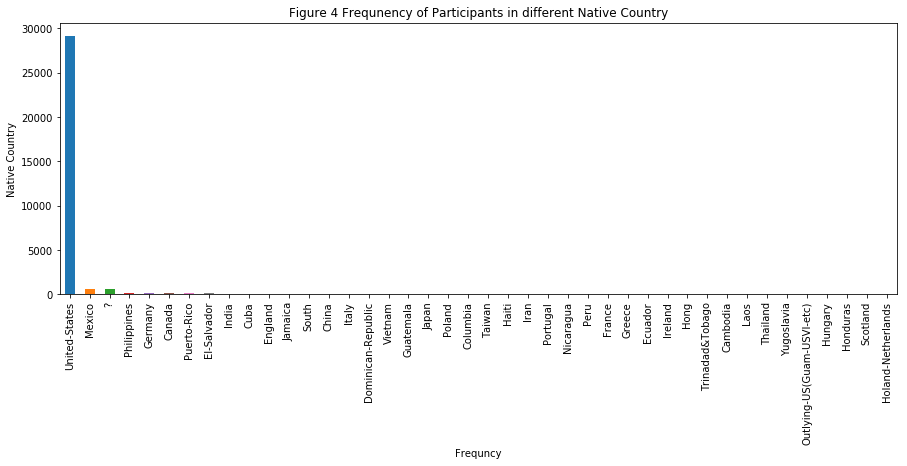

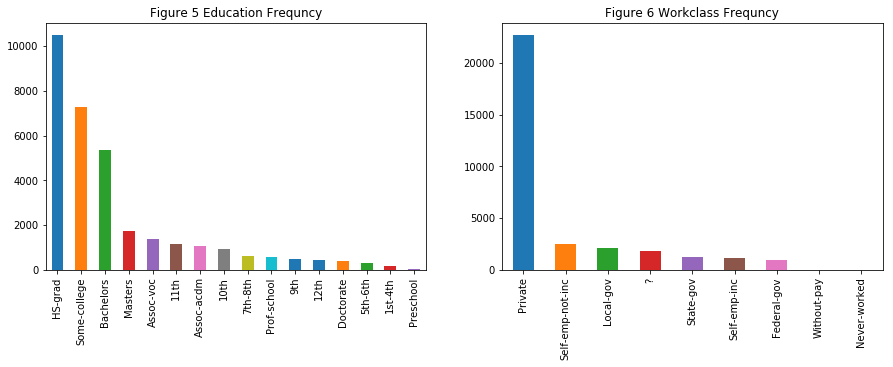

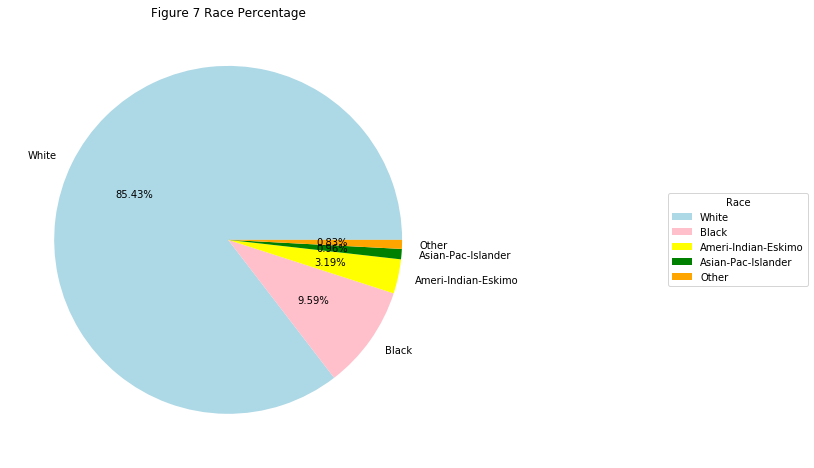

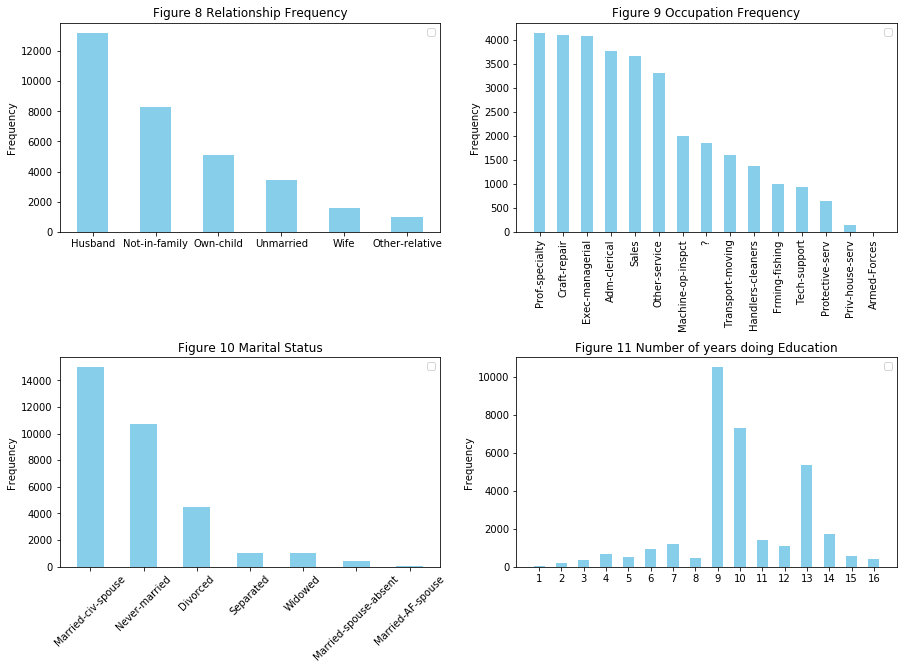

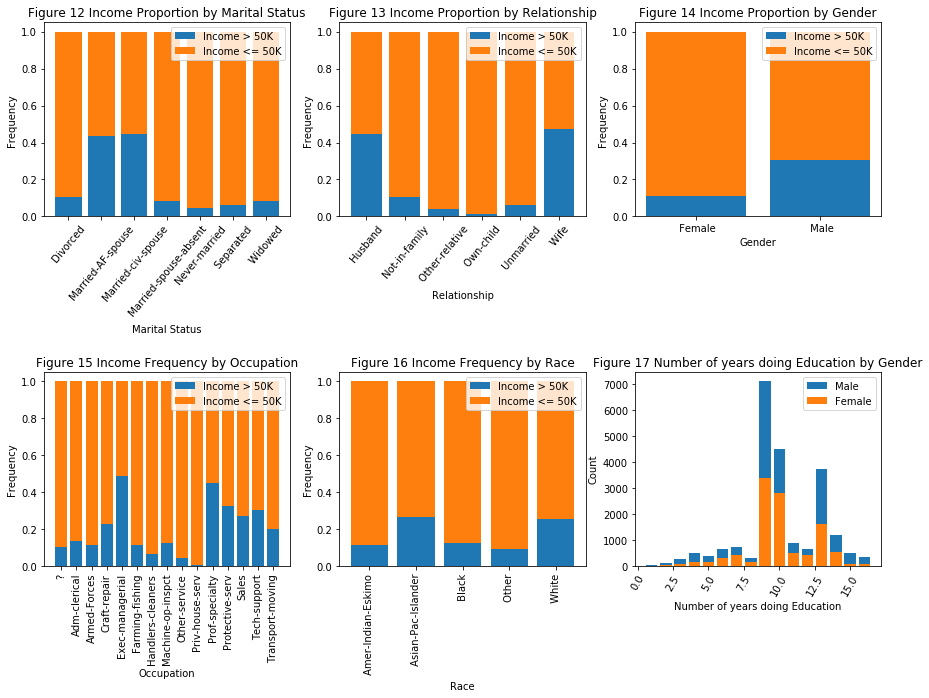

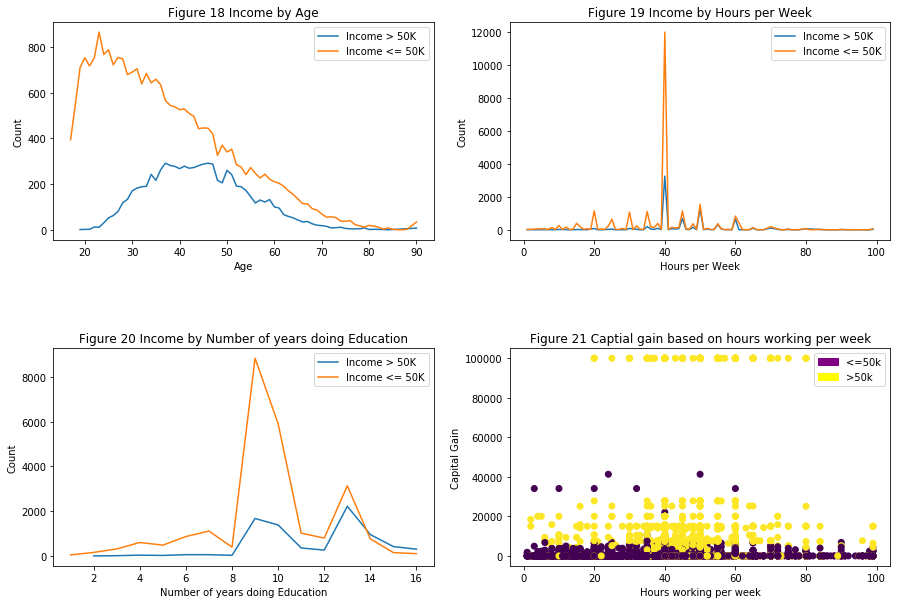

In [2]:
#creating the pie chart
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2 ,figsize=(10, 3), subplot_kw=dict(aspect="equal"))
plt.subplots_adjust(wspace=1)

labels= 'Male', 'Female'
sizes = np.array([21790,10771])
colors =['lightblue','pink']


ax1.pie(sizes, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=False)

ax1.legend(labels,
          title="Gender",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title("Firgure 2 Gender Percentage")

#Income
#plot race
labels = ['<=50k', '>50k']
dfIncome = df['income'].value_counts()
dfIncome
#creating the pie chart
# fig, ax2 = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"), sharey=True)


sizes = np.array([dfIncome[0], dfIncome[1]])
colors =['lightblue','pink']


ax2.pie(sizes, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=False)

ax2.legend(labels,
          title="Income",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax2.set_title("Figure 3 Income Percentage")
plt.show()

#Make Native-country piechart

df['native-country'].value_counts().plot(kind = 'bar',figsize=(15,5))
plt.xlabel('Frequncy')
plt.ylabel('Native Country')
plt.title("Figure 4 Frequnency of Participants in different Native Country")
plt.show()


#zoom plots together
plt.figure(1,figsize=(15, 10))
plt.subplot(2,2,1)
#plot education
df['education'].value_counts().plot(kind = 'bar', x="Education",y="Frequency",title="Figure 5 Education Frequncy")
plt.subplot(2,2,2)

#plot workclass
df['workclass'].value_counts().plot(kind = 'bar',ax=plt.gca(),x="Workclass",y="Frequency",title="Figure 6 Workclass Frequncy")

#plot race
labels = ['White', 'Black', 'Ameri-Indian-Eskimo', 'Asian-Pac-Islander','Other']
raceCount = df['race'].value_counts()
raceCount

#creating the pie chart
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))


sizes = np.array([raceCount[0],raceCount[1],raceCount[2],raceCount[3],raceCount[4]])
colors =['lightblue','pink','yellow', 'green', 'orange']


plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=False)

ax.legend(labels,
          title="Race",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 0.5, 1))
ax.set_title("Figure 7 Race Percentage")
plt.show()

#Relationship
dfRelationship = df['relationship'].value_counts()
dfRelationship
#subplots
fig, axes = plt.subplots(nrows=2, ncols=2 ,figsize=(15, 10))
plt.subplots_adjust(hspace=0.6)
ax1=axes[0,0]
ax2=axes[0,1]
ax3=axes[1,0]
ax4=axes[1,1]
#Displaying Relationship
label = 'Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative'
values =([dfRelationship[0],dfRelationship[1], dfRelationship[2], dfRelationship[3], dfRelationship[4], dfRelationship[5]])
width = 0.50  # the width of the bars
#amount of seperate columns/location
index = np.arange(len(values))
rect = ax1.bar(index, values, width, color = 'SkyBlue')

ax1.set_ylabel('Frequency')
ax1.set_title('Figure 8 Relationship Frequency')
ax1.set_xticks(index)
ax1.set_xticklabels(('Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative'))
ax1.legend()

#Displaying Occupation
dfOccupation = df['occupation'].value_counts()
dfOccupation
#bar chart over occupation
labels = 'Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', '?', 'Transport-moving', 'Handlers-cleaners', 'Frming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv','Armed-Forces'
values =([dfOccupation[0],dfOccupation[1],dfOccupation[2],dfOccupation[3],dfOccupation[4],dfOccupation[5],dfOccupation[6],dfOccupation[7],dfOccupation[8],dfOccupation[9],dfOccupation[10],dfOccupation[11],dfOccupation[12],dfOccupation[13],dfOccupation[14] ])
width = 0.50  # the width of the bars
#amount of seperate columns/location
index = np.arange(len(values))
rect = ax2.bar(index, values, width, color = 'SkyBlue')
ax2.set_ylabel('Frequency')
ax2.set_title('Figure 9 Occupation Frequency')
ax2.set_xticks(index)
ax2.xaxis.set_tick_params(rotation=90)
ax2.set_xticklabels(('Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', '?', 'Transport-moving', 'Handlers-cleaners', 'Frming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv','Armed-Forces'))
ax2.legend()

#Bar chart over MaritalStatus
dfMaritalStatus = df['marital-status'].value_counts()
dfMaritalStatus
#bar chart over Marital Status
labels = 'Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'


values =([dfMaritalStatus[0],dfMaritalStatus[1],dfMaritalStatus[2],dfMaritalStatus[3],dfMaritalStatus[4],dfMaritalStatus[5],dfMaritalStatus[6] ])
width = 0.50  # the width of the bars
#amount of seperate columns/location
index = np.arange(len(values))

rect = ax3.bar(index, values, width, color = 'SkyBlue')

ax3.set_ylabel('Frequency')
ax3.set_title('Figure 10 Marital Status')
ax3.set_xticks(index)
ax3.xaxis.set_tick_params(rotation=45)
ax3.set_xticklabels(('Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'))
ax3.legend()

#Bar chart over Number of years spent in education
dfEducationNum = df['education-num'].value_counts()
dfEducationNum
#bar chart over Marital Status
labels = '1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16'
values =([dfEducationNum[1],dfEducationNum[2],dfEducationNum[3],dfEducationNum[4], dfEducationNum[5],dfEducationNum[6],dfEducationNum[7],dfEducationNum[8],dfEducationNum[9],dfEducationNum[10],dfEducationNum[11],dfEducationNum[12],dfEducationNum[13],dfEducationNum[14],dfEducationNum[15],dfEducationNum[16]])
width = 0.50  # the width of the bars
#amount of seperate columns/location
index = np.arange(len(values))

rect = ax4.bar(index, values, width, color = 'SkyBlue')

ax4.set_ylabel('Frequency')
ax4.set_title('Figure 11 Number of years doing Education')
ax4.set_xticks(index)
ax4.set_xticklabels(('1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16'))
ax4.legend()

plt.show()


fig, axes = plt.subplots(nrows=2, ncols=3 ,figsize=(15, 10))
plt.subplots_adjust(hspace=0.8)
ax1=axes[0,0]
ax2=axes[0,1]
ax3=axes[0,2]
ax4=axes[1,0]
ax5=axes[1,1]
ax6=axes[1,2]
#group data by marital-status
grouped_marital_status = df.groupby('marital-status')
#get data where income are lower than 50K or greater than 50k and group them by marital-status
grouped_marital_status_1 = df[df['income'] == ' <=50K'].groupby('marital-status')
grouped_marital_status_2 = df[df['income'] == ' >50K'].groupby('marital-status')
#caculate the percentage of income (<=50K) for each group
ratio_marital_status_1=grouped_marital_status_1['income'].count()/grouped_marital_status['income'].count()
ratio_marital_status_2=grouped_marital_status_2['income'].count()/grouped_marital_status['income'].count()
# set the size of chart
p1=ax1.bar(ratio_marital_status_2.index.get_values(),ratio_marital_status_2)
p2=ax1.bar(ratio_marital_status_1.index.get_values(),ratio_marital_status_1,bottom = ratio_marital_status_2)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Marital Status')
ax1.xaxis.set_tick_params(rotation=50)
ax1.set_title('Figure 12 Income Proportion by Marital Status')
ax1.legend((p1[0], p2[0]), ('Income > 50K', 'Income <= 50K'))



#group data by relationship
grouped_relationship = df.groupby('relationship')
#get data where income are lower than 50K or greater than 50k and group them by relationship
grouped_relationship_1 = df[df['income'] == ' <=50K'].groupby('relationship')
grouped_relationship_2 = df[df['income'] == ' >50K'].groupby('relationship')
#caculate the percentage of income (<=50K) for each group
ratio_relationship_1=grouped_relationship_1['relationship'].count()/grouped_relationship['income'].count()
ratio_relationship_2=grouped_relationship_2['relationship'].count()/grouped_relationship['income'].count()

p1=ax2.bar(ratio_relationship_1.index.get_values(),ratio_relationship_2)
p2=ax2.bar(ratio_relationship_1.index.get_values(),ratio_relationship_1,bottom = ratio_relationship_2)
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Relationship')
ax2.xaxis.set_tick_params(rotation=50)
ax2.set_title('Figure 13 Income Proportion by Relationship')
ax2.legend((p1[0], p2[0]), ('Income > 50K', 'Income <= 50K'))


#group data by SEX
grouped_sex = df.groupby('sex')
#get data where income are lower than 50K or greater than 50k and group them by sex
grouped_sex_1 = df[df['income'] == ' <=50K'].groupby('sex')
grouped_sex_2 = df[df['income'] == ' >50K'].groupby('sex')
#caculate the count of income (<=50K) for each group
ratio_sex_1=grouped_sex_1['sex'].count()/grouped_sex['sex'].count()
ratio_sex_2=grouped_sex_2['sex'].count()/grouped_sex['sex'].count()
p1=ax3.bar(ratio_sex_2.index.get_values(),ratio_sex_2)
p2=ax3.bar(ratio_sex_1.index.get_values(),ratio_sex_1,bottom = ratio_sex_2)
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Gender')
ax3.set_title('Figure 14 Income Proportion by Gender')
ax3.legend((p1[0], p2[0]), ('Income > 50K', 'Income <= 50K'))

#group data by occupation
grouped_occupation = df.groupby('occupation')
#get data where income are lower than 50K or greater than 50k and group them by occupation
grouped_occupation_1 = df[df['income'] == ' <=50K'].groupby('occupation')
grouped_occupation_2 = df[df['income'] == ' >50K'].groupby('occupation')
#caculate the count of income (<=50K) for each group
ratio_occupation_1=grouped_occupation_1['occupation'].count()/grouped_occupation['occupation'].count()
ratio_occupation_2=grouped_occupation_2['occupation'].count()/grouped_occupation['occupation'].count()

p1=ax4.bar(ratio_occupation_2.index.get_values(),ratio_occupation_2)
p2=ax4.bar(ratio_occupation_1.index.get_values(),ratio_occupation_1,bottom = ratio_occupation_2)
ax4.set_ylabel('Frequency')
ax4.set_xlabel('Occupation')
ax4.xaxis.set_tick_params(rotation=90)
ax4.set_title('Figure 15 Income Frequency by Occupation')
ax4.legend((p1[0], p2[0]), ('Income > 50K', 'Income <= 50K'))

#group data by race
grouped_race = df.groupby('race')
#get data where income are lower than 50K or greater than 50k and group them by race
grouped_race_1 = df[df['income'] == ' <=50K'].groupby('race')
grouped_race_2 = df[df['income'] == ' >50K'].groupby('race')
#caculate the count of income (<=50K) and >50K for each group
ratio_race_1=grouped_race_1['race'].count()/grouped_race['race'].count()
ratio_race_2=grouped_race_2['race'].count()/grouped_race['race'].count()

p1=ax5.bar(ratio_race_2.index.get_values(),ratio_race_2)
p2=ax5.bar(ratio_race_1.index.get_values(),ratio_race_1,bottom = ratio_race_2)
ax5.set_ylabel('Frequency')
ax5.set_xlabel('Race')
ax5.xaxis.set_tick_params(rotation=90)
ax5.set_title('Figure 16 Income Frequency by Race')
ax5.legend((p1[0], p2[0]), ('Income > 50K', 'Income <= 50K'))

#group data by education
grouped_edu = df.groupby('education-num')
#get data for male, female and group them by education
grouped_education_1 = df[df['sex'] == ' Male'].groupby('education-num')
grouped_education_2 = df[df['sex'] == ' Female'].groupby('education-num')

ax6.bar(grouped_education_1['education-num'].count().index.get_values(),grouped_education_1['education-num'].count())
ax6.bar(grouped_education_2['education-num'].count().index.get_values(),grouped_education_2['education-num'].count())
ax6.xaxis.set_tick_params(rotation=60)
ax6.set_ylabel('Count')
ax6.set_xlabel('Number of years doing Education')
ax6.set_title('Figure 17 Number of years doing Education by Gender')
ax6.legend((p1[0], p2[0]), ('Male', 'Female'))

plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2 ,figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
ax1=axes[0,0]
ax2=axes[0,1]
ax3=axes[1,0]
ax4=axes[1,1]

#group data by age
grouped_age = df.groupby('age')
#get data where income are lower than 50K or greater than 50k and group them by age
grouped_age_1 = df[df['income'] == ' <=50K'].groupby('age')
grouped_age_2 = df[df['income'] == ' >50K'].groupby('age')
#caculate the count of income (<=50K) and (>50K) for each group
ratio_age_1=grouped_age_1['age'].count()
ratio_age_2=grouped_age_2['age'].count()

p1=ax1.plot(ratio_age_2.index.get_values(),ratio_age_2)
p2=ax1.plot(ratio_age_1.index.get_values(),ratio_age_1)
ax1.set_ylabel('Count')
ax1.set_xlabel('Age')
ax1.set_title('Figure 18 Income by Age')
ax1.legend((p1[0], p2[0]), ('Income > 50K', 'Income <= 50K'))


#group data by hours-per-week
grouped_hours = df.groupby('hours-per-week')
#get data where income are lower than 50K or greater than 50k and group them by hours-per-week
grouped_hours_1 = df[df['income'] == ' <=50K'].groupby('hours-per-week')
grouped_hours_2 = df[df['income'] == ' >50K'].groupby('hours-per-week')
#caculate the count of income (<=50K) for each group
ratio_hours_1=grouped_hours_1['hours-per-week'].count()
ratio_hours_2=grouped_hours_2['hours-per-week'].count()

p1=ax2.plot(ratio_hours_2.index.get_values(),ratio_hours_2)
p2=ax2.plot(ratio_hours_1.index.get_values(),ratio_hours_1)
ax2.set_ylabel('Count')
ax2.set_xlabel('Hours per Week')
ax2.set_title('Figure 19 Income by Hours per Week')
ax2.legend((p1[0], p2[0]), ('Income > 50K', 'Income <= 50K'))

#group data by Number of years doing Education
grouped_education_years = df.groupby('education-num')
#get data where income are lower than 50K or greater than 50k and group them by Number of years doing Education
grouped_education_years_1 = df[df['income'] == ' <=50K'].groupby('education-num')
grouped_education_years_2 = df[df['income'] == ' >50K'].groupby('education-num')
#caculate the count of income (<=50K) and (>50K) for each group
ratio_education_years_1=grouped_education_years_1['education-num'].count()
ratio_education_years_2=grouped_education_years_2['education-num'].count()

p1=ax3.plot(ratio_education_years_2.index.get_values(),ratio_education_years_2)
p2=ax3.plot(ratio_education_years_1.index.get_values(),ratio_education_years_1)
ax3.set_ylabel('Count')
ax3.set_xlabel('Number of years doing Education')
ax3.set_title('Figure 20 Income by Number of years doing Education')
ax3.legend((p1[0], p2[0]), ('Income > 50K', 'Income <= 50K'))


#import packages
import matplotlib.patches as mpatches

dfEducationNumPlot = df['capital-gain']
dfHoursPerWeekPlot = df['hours-per-week']
tmp = df.copy()
v = tmp['income'].unique()
m_1 =tmp['income'] == v[0]
m_2 = tmp['income'] == v[1]
tmp.loc[m_1, 'income'] = 0
tmp.loc[m_2, 'income'] = 1

lessThan50k = mpatches.Patch(color='purple', label='<=50k')
moreThan50k = mpatches.Patch(color='yellow', label='>50k')

ax4.legend(handles=[lessThan50k, moreThan50k])
ax4.set_title('Figure 21 Captial gain based on hours working per week')
ax4.set_ylabel('Capital Gain')
ax4.set_xlabel('Hours working per week')
ax4.scatter(dfHoursPerWeekPlot, dfEducationNumPlot, c = tmp['income'])

plt.show()


In [3]:
#Task 4-1: Data Modeling

#Model 1 -------------------------------- KNearestNeighbor model

#importing packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Data Pre Processing

#have a look at data type
df.info()
df_knn=df.copy()
#
df_knn = df_knn[df_knn["workclass"] != "?" ]
df_knn = df_knn[df_knn["occupation"] != "?" ]
df_knn = df_knn[df_knn["native-country"] != "?" ]
#transform object to numeric values, since model cannot understand strings
#workclass
workclass={'Private':0,'Self-emp-not-inc':1,'Local-gov':2,'State-gov':3,'Self-emp-inc':4,'Federal-gov':5,'Without-pay':6}
df_knn['workclass'] = [workclass[item] for item in df_knn['workclass']] 

#education
education_name = df_knn['education'].unique()
education={}
i=0
for value in education_name:
    education[value]=i
    i=i+1
df_knn['education'] = [education[item] for item in df_knn['education']] 

#marital status
marital_status_name = df_knn['marital-status'].unique()
marital_status={}
i=0
for value in marital_status_name:
    marital_status[value]=i
    i=i+1
df_knn['marital-status'] = [marital_status[item] for item in df_knn['marital-status']] 


#occupation
occupation_name = df_knn['occupation'].unique()
occupation={}
i=0
for value in occupation_name:
    occupation[value]=i
    i=i+1
df_knn['occupation'] = [occupation[item] for item in df_knn['occupation']] 

#relationship
relationship_name = df_knn['relationship'].unique()
relationship={}
i=0
for value in relationship_name:
    relationship[value]=i
    i=i+1
df_knn['relationship'] = [relationship[item] for item in df_knn['relationship']] 


#race
race_name = df_knn['race'].unique()
race={}
i=0
for value in race_name:
    race[value]=i
    i=i+1
df_knn['race'] = [race[item] for item in df_knn['race']] 

#sex
sex_name = df_knn['sex'].unique()
sex={}
i=0
for value in sex_name:
    sex[value]=i
    i=i+1
df_knn['sex'] = [sex[item] for item in df_knn['sex']] 

#native-country
country_name = df_knn['native-country'].unique()
country={}
i=0
for value in country_name:
    country[value]=i
    i=i+1
df_knn['native-country'] = [country[item] for item in df_knn['native-country']] 

#income
income_name = df_knn['income'].unique()
income={}
i=0
for value in income_name:
    income[value]=i
    i=i+1
df_knn['income'] = [income[item] for item in df_knn['income']] 

#seperate prediction svariable and features
X = df_knn.values[:, :-1]
y = df_knn.values[:, -1]

#remove columns
df_knn_new = df_knn.copy()
df_knn_new = df_knn_new.drop(columns = ['fnlwgt','relationship','education'])
#seperate prediction svariable and features
X_new = df_knn_new.values[:, :-1]
y_new = df_knn_new.values[:, -1]

#Split the data into training set and the test set, accroding to assignment requirement
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_new,y_new,test_size=0.50,random_state=4)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_new,y_new,test_size=0.40,random_state=4)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_new,y_new,test_size=0.20,random_state=4)

#select the k for K Nearest Neighbor model
max_accuracy=0
k=0
for i in range(1,25):
    neiclassifier = KNeighborsClassifier(i)
    neiclassifier.fit(X_train_1, y_train_1)
    predicted_1 = neiclassifier.predict(X_test_1)
    a1 = accuracy_score(y_test_1,predicted_1)
    if a1 > max_accuracy:
        max_accuracy = a1
        k=i
print("selected k: ", k)
#select the k for K Nearest Neighbor model
max_accuracy=0
k=0
for i in range(1,25):
    neiclassifier = KNeighborsClassifier(i)
    neiclassifier.fit(X_train_2, y_train_2)
    predicted_2 = neiclassifier.predict(X_test_2)
    a2 = accuracy_score(y_test_2,predicted_2)
    if a2 > max_accuracy:
        max_accuracy = a2
        k=i
print("selected k: ", k)

#select the k for K Nearest Neighbor model
max_accuracy=0
k=0
for i in range(1,25):
    neiclassifier = KNeighborsClassifier(i)
    neiclassifier.fit(X_train_3, y_train_3)
    predicted_3 = neiclassifier.predict(X_test_3)
    a3 = accuracy_score(y_test_3,predicted_3)
    if a3 > max_accuracy:
        max_accuracy = a3
        k=i
print("selected k: ", k)

#select k=10
#build the kNN classifier
neiclassifier = KNeighborsClassifier(10)
neiclassifier.fit(X_train_1, y_train_1)
predicted_1 = neiclassifier.predict(X_test_1)
a1 = accuracy_score(y_test_1,predicted_1)
cm_1 = confusion_matrix(y_test_1,predicted_1)
print classification_report(y_test_1,predicted_1)
# Print out confusion matrix
print(cm_1)
print('Error Rate: {}'.format(np.divide(np.sum([cm_1[0,1],cm_1[1,0]]).astype(np.float),np.sum(cm_1))))



#build the kNN classifier
neiclassifier = KNeighborsClassifier(14)
neiclassifier.fit(X_train_2, y_train_2)
predicted_2 = neiclassifier.predict(X_test_2)
a2 = accuracy_score(y_test_2,predicted_2)
cm_2 = confusion_matrix(y_test_2,predicted_2)
print classification_report(y_test_2,predicted_2)
# Print out confusion matrix
print(cm_2)
print('Error Rate: {}'.format(np.divide(np.sum([cm_2[0,1],cm_2[1,0]]).astype(np.float),np.sum(cm_2))))


#build the kNN classifier
neiclassifier = KNeighborsClassifier(20)
neiclassifier.fit(X_train_3, y_train_3)
predicted_3 = neiclassifier.predict(X_test_3)
a3 = accuracy_score(y_test_3,predicted_3)
cm_3 = confusion_matrix(y_test_3,predicted_3)
print classification_report(y_test_3,predicted_3)
# Print out confusion matrix
print(cm_3)
print('Error Rate: {}'.format(np.divide(np.sum([cm_3[0,1],cm_3[1,0]]).astype(np.float),np.sum(cm_3))))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
('selected k: ', 10)
('selected k: ', 14)
('selected k: ', 20)
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     11361
           1       0.76      0.50      0.60      3720

   micro avg       0



Without KFold cross validation and tweaking parameters
test size 50%
[[10579  1744]
 [ 1864  2094]]
              precision    recall  f1-score   support

       <=50K       0.85      0.86      0.85     12323
        >50K       0.55      0.53      0.54      3958

   micro avg       0.78      0.78      0.78     16281
   macro avg       0.70      0.69      0.70     16281
weighted avg       0.78      0.78      0.78     16281

Searching for highest cross validation score for depth between 3 and 50


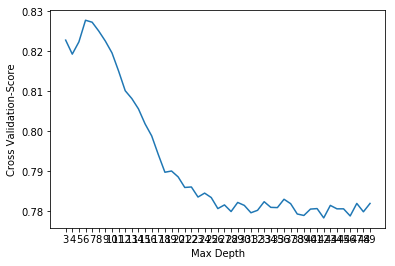

Index: 6
Cross Validation Score: 0.8277627044845971
Searching for highest cross validation score for a certain min samples split between 0 and 300


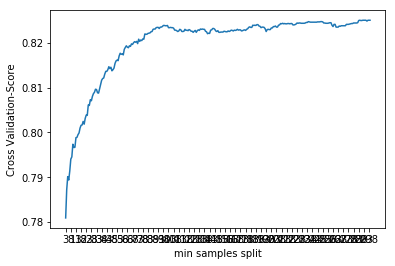

Index: 289
Cross Validation Score: 0.825061120228564


With Tweaked paramters
[[11247  1076]
 [ 1742  2216]]
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89     12323
        >50K       0.67      0.56      0.61      3958

   micro avg       0.83      0.83      0.83     16281
   macro avg       0.77      0.74      0.75     16281
weighted avg       0.82      0.83      0.82     16281

Searching for highest cross validation score for depth between 3 and 50
Test Size: 40%


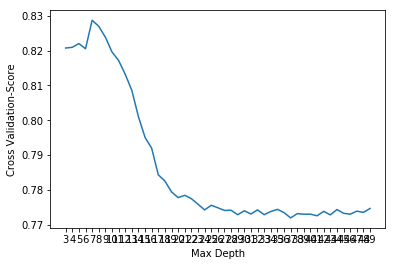

Index: 7
Cross Validation Score: 0.8287263830938263
Searching for highest cross validation score for a certain min samples split between 0 and 300


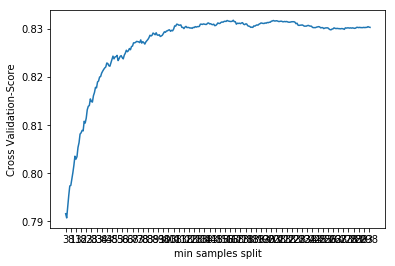

Index: 166
Cross Validation Score: 0.83184787077172


With Tweaked paramters
[[9087  786]
 [1372 1780]]
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      9873
        >50K       0.69      0.56      0.62      3152

   micro avg       0.83      0.83      0.83     13025
   macro avg       0.78      0.74      0.76     13025
weighted avg       0.83      0.83      0.83     13025

Searching for highest cross validation score for depth between 3 and 50
Test Size: 20%


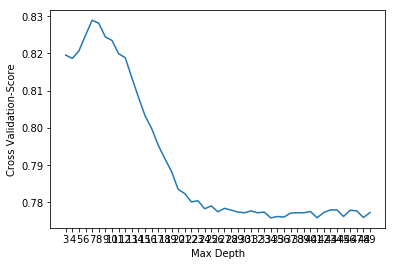

Index: 7
Cross Validation Score: 0.8289311089969619
Searching for highest cross validation score for a certain min samples split between 0 and 300


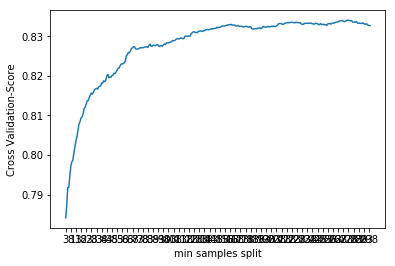

Index: 277
Cross Validation Score: 0.8340755647534295


With Tweaked paramters
[[4453  465]
 [ 673  922]]
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      4918
        >50K       0.66      0.58      0.62      1595

   micro avg       0.83      0.83      0.83      6513
   macro avg       0.77      0.74      0.75      6513
weighted avg       0.82      0.83      0.82      6513



In [4]:
#Task 4-2: Data Modeling

#Model 2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#copy the dataframe
df_tree = df.copy()
abc = ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex','hours-per-week', 'native-country' ]
#getting the specific attributes
X = df_tree.iloc[:,[0,1,3,4,5,6,7,8,9,12,13]].values
#income attribute as the class label
Z = pd.DataFrame(X)

"""X is 10 columns
Age, workclass, education, education-num, marital-status, 
occupation, relationship, race, sex, hours-per-week, native-country,
"""
#import labelencoder  for converting categorical variables
#to numerical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
#column workclass
X[:,1] = labelencoder_X.fit_transform(X[:,1])
#column education
X[:,2] = labelencoder_X.fit_transform(X[:,2])
#column education-num
X[:,3] = labelencoder_X.fit_transform(X[:,3])
#column marital-status
X[:,4] = labelencoder_X.fit_transform(X[:,4])
#column occupation
X[:,5] = labelencoder_X.fit_transform(X[:,5])
#column relationship
X[:,6] = labelencoder_X.fit_transform(X[:,6])
#column race
X[:,7] = labelencoder_X.fit_transform(X[:,7])
#column sex
X[:,8] = labelencoder_X.fit_transform(X[:,8])
#column native-country
X[:,10] = labelencoder_X.fit_transform(X[:,10])

#new dataframe with categorical variables changed to numerical 
Z = pd.DataFrame(X)
#getting all the feature columns
feature_cols = [0,1,2,3,4,5,6,7,8,9,10]
#A dataframe contains all the feature columns
A = Z[feature_cols]
#B contains the class label
B = df_tree['income']
#convert into numpy array for decisiont tree classifier and validation
featureA = A.values
featureB = B.values
print ("\n\nWithout KFold cross validation and tweaking parameters")
print("test size 50%")
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.5, random_state=0)
#running default tree classifier to see results 
clf = DecisionTreeClassifier(criterion='gini')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
#displa y confusion matrix
cm = confusion_matrix(y_test, y_pre)
print cm
#display classification report
print classification_report(y_test, y_pre)


#CONTINUE EXPLORING FROM HERE DEPTH
#************************************************************************************************************

print("Searching for highest cross validation score for depth between 3 and 50")
train_X, test_X, train_y, test_y = train_test_split(featureA,featureB,test_size = 0.5)


#loop from 3 to 50, changing the max depth and running through a cross validation score with 10 folds
#here we get the mean and add to a depthvalue list
#we attempt to find the best depth for use as our parameter
depthValue = []
for i in range(3,50):
    dTC = DecisionTreeClassifier(max_depth = i)
    scores = cross_val_score(dTC, train_X, train_y, cv = 10, n_jobs = 4)
    depthValue.append((scores.mean()))
    
#plotting a density graph on the cross validation score to determine
#the best max value
plt.plot(range(3,50),depthValue)
plt.xlabel('Max Depth')
plt.xticks(np.arange(3, 50, 1.0))
plt.ylabel('Cross Validation-Score')
plt.show()

maxDepthIndex = depthValue.index(max(depthValue))
#assigning variable for final prediction index
print "Index: " +str(maxDepthIndex+3) 
print("Cross Validation Score: " + str(depthValue[maxDepthIndex]))
#the actual depth for assigning later
bestDepthValue = maxDepthIndex+3

#MIN SAMPLES SPLIT
print "Searching for highest cross validation score for a certain min samples split between 0 and 300"
train_X, test_X, train_y, test_y = train_test_split(featureA,featureB,test_size = 0.5)

#same thing with the depth but on the minimum samples split
minSampleValue = []
for i in range(3,300):
    dTC = DecisionTreeClassifier( min_samples_split = i)
    scores = cross_val_score(dTC, train_X, train_y, cv = 10, n_jobs = 4)
    minSampleValue.append((scores.mean()))
    
plt.plot(range(3,300),minSampleValue)
plt.xlabel('min samples split')
plt.xticks(np.arange(3, 300, 5)) 
plt.ylabel('Cross Validation-Score')
plt.show()

minIndex = minSampleValue.index(max(minSampleValue))
print "Index: "+ str(minIndex+3)
print("Cross Validation Score: " + str(minSampleValue[minIndex]))

#assigning variable for final prediction min samples split
bestMinSamplesSplitValue = minIndex + 3

#With new parameters 
print ("\n\nWith Tweaked paramters")
# Split dataset into training set and test set 50%
X_train, X_test, y_train, y_test = train_test_split(featureA, featureB, test_size=0.5, random_state=0)
clf = DecisionTreeClassifier(criterion='gini', max_depth = bestDepthValue, min_samples_split = bestMinSamplesSplitValue)

fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
print cm
print classification_report(y_test, y_pre)

#CONTINUE EXPLORING FROM HERE DEPTH
#************************************************************************************************************

print("Searching for highest cross validation score for depth between 3 and 50")
print "Test Size: 40%"
train_X, test_X, train_y, test_y = train_test_split(featureA,featureB,test_size = 0.4)
#loop from 3 to 50, changing the max depth and running through a cross validation score with 10 folds
#here we get the mean and add to a depthvalue list
#we attempt to find the best depth for use as our parameter
depthValue = []
for i in range(3,50):
    dTC = DecisionTreeClassifier(max_depth = i)
    scores = cross_val_score(dTC, train_X, train_y, cv = 10, n_jobs = 4)
    depthValue.append((scores.mean()))
    
#plotting a density graph on the cross validation score to determine
#the best max value
plt.plot(range(3,50),depthValue)
plt.xlabel('Max Depth')
plt.xticks(np.arange(3, 50, 1.0))
plt.ylabel('Cross Validation-Score')
plt.show()


maxDepthIndex = depthValue.index(max(depthValue))
#assigning variable for final prediction index
print "Index: " +str(maxDepthIndex+3) 
print("Cross Validation Score: " + str(depthValue[maxDepthIndex]))
#the actual depth for assigning later
bestDepthValue = maxDepthIndex+3

#MIN SAMPLES SPLIT
print "Searching for highest cross validation score for a certain min samples split between 0 and 300"
train_X, test_X, train_y, test_y = train_test_split(featureA,featureB,test_size = 0.4)

#same thing with the depth but on the minimum samples split
minSampleValue = []
for i in range(3,300):
    dTC = DecisionTreeClassifier( min_samples_split = i)
    scores = cross_val_score(dTC, train_X, train_y, cv = 10, n_jobs = 4)
    minSampleValue.append((scores.mean()))
    
plt.plot(range(3,300),minSampleValue)
plt.xlabel('min samples split')
plt.xticks(np.arange(3, 300, 5)) 
plt.ylabel('Cross Validation-Score')
plt.show()


minIndex = minSampleValue.index(max(minSampleValue))
print "Index: "+ str(minIndex+3)
print("Cross Validation Score: " + str(minSampleValue[minIndex]))


#assigning variable for final prediction min samples split
bestMinSamplesSplitValue = minIndex + 3

#With new parameters 
print ("\n\nWith Tweaked paramters")
# Split dataset into training set and test set 40%
X_train, X_test, y_train, y_test = train_test_split(featureA, featureB, test_size=0.4, random_state=0)
clf = DecisionTreeClassifier(criterion='gini', max_depth = bestDepthValue, min_samples_split = bestMinSamplesSplitValue)

fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

cm = confusion_matrix(y_test, y_pre)
print cm
print classification_report(y_test, y_pre)

#CONTINUE EXPLORING FROM HERE DEPTH
#************************************************************************************************************

print("Searching for highest cross validation score for depth between 3 and 50")
print "Test Size: 20%"
train_X, test_X, train_y, test_y = train_test_split(featureA,featureB,test_size = 0.2)

#loop from 3 to 50, changing the max depth and running through a cross validation score with 10 folds
#here we get the mean and add to a depthvalue list
#we attempt to find the best depth for use as our parameter
depthValue = []
for i in range(3,50):
    dTC = DecisionTreeClassifier(max_depth = i)
    scores = cross_val_score(dTC, train_X, train_y, cv = 10, n_jobs = 4)
    depthValue.append((scores.mean()))
    
#plotting a density graph on the cross validation score to determine
#the best max value
plt.plot(range(3,50),depthValue)
plt.xlabel('Max Depth')
plt.xticks(np.arange(3, 50, 1.0))
plt.ylabel('Cross Validation-Score')
plt.show()


maxDepthIndex = depthValue.index(max(depthValue))
#assigning variable for final prediction index
print "Index: " +str(maxDepthIndex+3) 
print("Cross Validation Score: " + str(depthValue[maxDepthIndex]))
#the actual depth for assigning later
bestDepthValue = maxDepthIndex+3

#MIN SAMPLES SPLIT
print "Searching for highest cross validation score for a certain min samples split between 0 and 300"
train_X, test_X, train_y, test_y = train_test_split(featureA,featureB,test_size = 0.2)
#same thing with the depth but on the minimum samples split
minSampleValue = []
for i in range(3,300):
    dTC = DecisionTreeClassifier( min_samples_split = i)
    scores = cross_val_score(dTC, train_X, train_y, cv = 10, n_jobs = 4)
    minSampleValue.append((scores.mean()))
    
plt.plot(range(3,300),minSampleValue)
plt.xlabel('min samples split')
plt.xticks(np.arange(3, 300, 5)) 
plt.ylabel('Cross Validation-Score')
plt.show()

minIndex = minSampleValue.index(max(minSampleValue))
print "Index: "+ str(minIndex+3)
print("Cross Validation Score: " + str(minSampleValue[minIndex]))

#assigning variable for final prediction min samples split
bestMinSamplesSplitValue = minIndex + 3
#With new parameters 
print ("\n\nWith Tweaked paramters")
# Split dataset into training set and test set 40%
X_train, X_test, y_train, y_test = train_test_split(featureA, featureB, test_size=0.2, random_state=0)
clf = DecisionTreeClassifier(criterion='gini', max_depth = bestDepthValue, min_samples_split = bestMinSamplesSplitValue)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
print cm
print classification_report(y_test, y_pre)
